Notebook used for stationarity testing of financial -and aini variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path
from scipy.stats import shapiro

# Add src/scripts & modelling to the Python modules search path
root_dir = Path.cwd().parent
sys.path.append(str(root_dir / "src" / "scripts"))
sys.path.append(str(root_dir / "src" / "modelling"))

# import custom functions
from stationarity_testing import test_stationarity_aini_variants, test_stationarity_fin_variables

Load & verify data for binary AINI

In [2]:
# Get notebook's parent file location 
project_root = Path().resolve().parents[0] 

# get reports path for figures (see below)
fig_path = project_root / "reports" / "figures" 

# get variables path
var_path = project_root / "data" / "processed" / "variables" 

# get financial data path
fin_path = project_root / "data" / "raw" / "financial" 

# load financial data
fin_data = pd.read_csv(fin_path / "full_daily_2023_2025.csv")

# load AINI predictions
aini_data = pd.read_csv(var_path / "binary_AINI_variables.csv")

In [3]:
# verify financial data
print(fin_data.head())
print(fin_data.isna().any())

# verify AINI data
print(aini_data.head())
print(aini_data.isna().any())


         Date Ticker       Open       High        Low      Close  Adj Close  \
0  2023-01-03   ROBO  46.779999  47.250000  46.279999  46.570000  46.318817   
1  2023-01-04   ROBO  47.020000  47.490002  46.910000  47.330002  47.074722   
2  2023-01-05   ROBO  46.950001  47.060001  46.582001  46.720001  46.468010   
3  2023-01-06   ROBO  47.110001  48.139999  46.680000  47.990002  47.731163   
4  2023-01-09   ROBO  48.570000  49.490002  48.570000  48.860001  48.596470   

   Volume  
0   62000  
1   64900  
2   76400  
3   75300  
4   82100  
Date         False
Ticker       False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
   Unnamed: 0        date  normalized_AINI  simple_AINI  MA_7  MA_30  EMA_02  \
0           0  2023-04-01              0.0          NaN   NaN    NaN     0.0   
1           1  2023-04-02              0.0          NaN   NaN    NaN     0.0   
2           2  2023-04-03              0.0       

In [4]:
# ensure sorting
fin_data['Date'] = pd.to_datetime(fin_data['Date'])
fin_data = fin_data.sort_values(['Ticker', 'Date'])

# Calculate log returns by Ticker
fin_data['LogReturn'] = fin_data.groupby('Ticker')['Adj Close'].transform(lambda x: np.log(x) - np.log(x.shift(1)))

create log returns

In [5]:
# ensure sorting
fin_data['Date'] = pd.to_datetime(fin_data['Date'])
fin_data = fin_data.sort_values(['Ticker', 'Date'])

# Calculate log returns by Ticker
fin_data['LogReturn'] = fin_data.groupby('Ticker')['Adj Close'].transform(lambda x: np.log(x) - np.log(x.shift(1)))

inspect distribution

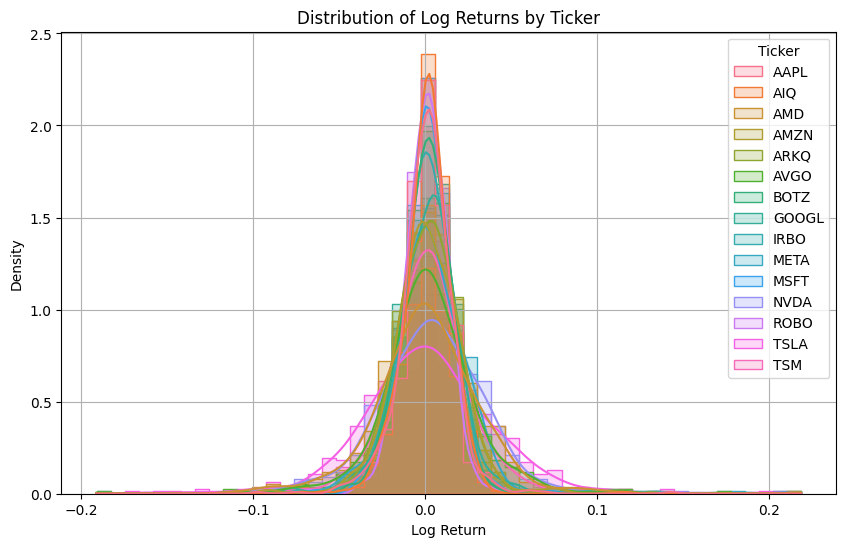

In [6]:
# Plot distribution of log returns
plt.figure(figsize=(10, 6))
sns.histplot(data=fin_data, x='LogReturn', kde=True, bins=50, hue='Ticker', element='step', stat='density')
plt.title('Distribution of Log Returns by Ticker')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Use Shapiro-Wilk-test to test for Normal Distribution

In [7]:
# Group by Ticker and run Shapiro-Wilk test on LogReturn
results = {}

for ticker, group in fin_data.groupby('Ticker'):
    returns = group['LogReturn'].dropna()
    stat, p_value = shapiro(returns)
    results[ticker] = {'W': stat, 'p-value': p_value}

# Print results
for ticker, res in results.items():
    print(f"Ticker: {ticker} → W = {res['W']:.4f}, p-value = {res['p-value']:.4f}")
    if res['p-value'] < 0.05:
        print("  ⇒ Reject normality (not normally distributed)\n")
    else:
        print("  ⇒ Fail to reject normality (could be normally distributed)\n")

Ticker: AAPL → W = 0.9006, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AIQ → W = 0.9398, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AMD → W = 0.9568, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AMZN → W = 0.9583, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: ARKQ → W = 0.9711, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AVGO → W = 0.8955, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: BOTZ → W = 0.9564, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: GOOGL → W = 0.9498, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: IRBO → W = 0.9382, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: META → W = 0.8527, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: MSFT → W = 0.9549, p-value = 0.0000
  ⇒ Reject normality (not n

Test for Unit Root via Augmented Dickey-Fuller test (ADF), and the Phillips-Perron test (PP)

In [8]:
# test variables for stationarity
aini_stat_df = test_stationarity_aini_variants(aini_data)
fin_stat_df = test_stationarity_fin_variables(fin_data)
aini_stat_df

✅ Stationarity test results saved to: C:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\data\processed\variables\stationarity_tests_aini_var.csv
✅ Stationarity test results saved to: C:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\data\processed\variables\stationarity_tests_fin_var.csv


,Period,AINI_variant,Context_window,ADF_stat,ADF_p,PP_stat,PP_p,agree_stationarity
0,2023,normalized_AINI,None,-14.384678,9.031221e-27,-14.421567,7.896267e-27,True
1,2023,MA_7,None,-4.361471,3.470714e-04,-4.052516,1.159160e-03,True
2,2023,MA_30,None,-2.691756,7.547574e-02,-3.172598,2.162664e-02,False
3,2023,EMA_02,None,-4.877886,3.850087e-05,-4.311296,4.246248e-04,True
4,2023,EMA_04,None,-6.920734,1.148278e-09,-6.769339,2.666480e-09,True
5,2023,EMA_06,None,-9.308129,1.066983e-15,-9.143109,2.814464e-15,True
6,2023,EMA_08,None,-11.681107,1.740526e-21,-11.644587,2.107111e-21,True
7,2023,normalized_AINI_growth,None,-7.812184,7.021876e-12,-56.738559,0.000000e+00,True
8,2023,relative_AINI_weekly,None,-7.361350,9.482242e-11,-17.376357,5.102925e-30,True
9,2023,relative_AINI_month,None,-13.749767,1.055912e-25,-13.648767,1.600713e-25,True


Load & verify data for polarity AINI, windowsize = 1

In [9]:
# Get notebook's parent file location 
project_root = Path().resolve().parents[0] 

# get reports path for figures (see below)
fig_path = project_root / "reports" / "figures" 

# get variables path
var_path = project_root / "data" / "processed" / "variables" 

# get financial data path
fin_path = project_root / "data" / "raw" / "financial" 

# load financial data
fin_data = pd.read_csv(fin_path / "full_daily_2023_2025.csv")

# load AINI predictions
aini_data = pd.read_csv(var_path / "w1_AINI_variables.csv")

In [10]:
# verify financial data
print(fin_data.head())
print(fin_data.isna().any())

# verify AINI data
print(aini_data.head())
print(aini_data.isna().any())

         Date Ticker       Open       High        Low      Close  Adj Close  \
0  2023-01-03   ROBO  46.779999  47.250000  46.279999  46.570000  46.318817   
1  2023-01-04   ROBO  47.020000  47.490002  46.910000  47.330002  47.074722   
2  2023-01-05   ROBO  46.950001  47.060001  46.582001  46.720001  46.468010   
3  2023-01-06   ROBO  47.110001  48.139999  46.680000  47.990002  47.731163   
4  2023-01-09   ROBO  48.570000  49.490002  48.570000  48.860001  48.596470   

   Volume  
0   62000  
1   64900  
2   76400  
3   75300  
4   82100  
Date         False
Ticker       False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
   Unnamed: 0        date  normalized_AINI  MA_7  MA_30  EMA_02  EMA_04  \
0           0  2023-04-06              0.0   NaN    NaN  0.0000  0.0000   
1           1  2023-04-10             -1.0   NaN    NaN -0.2000 -0.4000   
2           2  2023-04-14              0.0   NaN    NaN -0.1600 

In [11]:
# ensure sorting
fin_data['Date'] = pd.to_datetime(fin_data['Date'])
fin_data = fin_data.sort_values(['Ticker', 'Date'])

# Calculate log returns by Ticker
fin_data['LogReturn'] = fin_data.groupby('Ticker')['Adj Close'].transform(lambda x: np.log(x) - np.log(x.shift(1)))

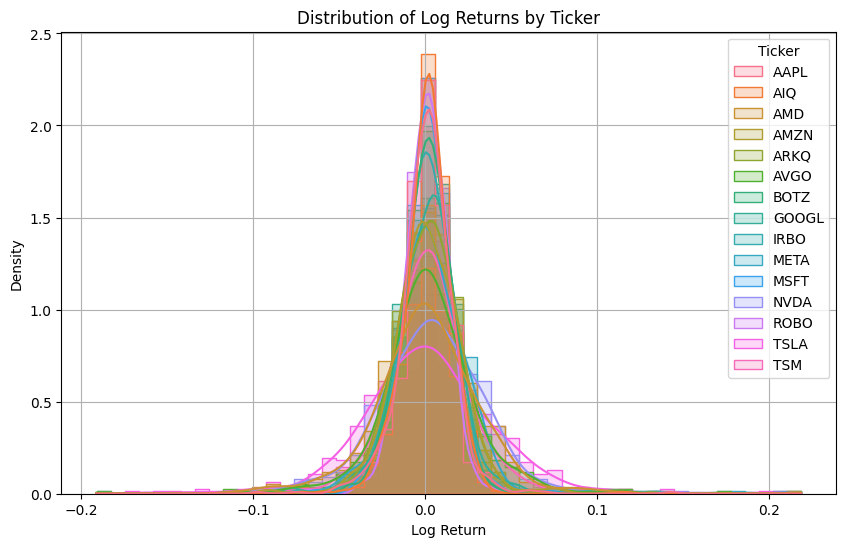

In [12]:
# Plot distribution of log returns
plt.figure(figsize=(10, 6))
sns.histplot(data=fin_data, x='LogReturn', kde=True, bins=50, hue='Ticker', element='step', stat='density')
plt.title('Distribution of Log Returns by Ticker')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [13]:
# Group by Ticker and run Shapiro-Wilk test on LogReturn
results = {}

for ticker, group in fin_data.groupby('Ticker'):
    returns = group['LogReturn'].dropna()
    stat, p_value = shapiro(returns)
    results[ticker] = {'W': stat, 'p-value': p_value}

# Print results
for ticker, res in results.items():
    print(f"Ticker: {ticker} → W = {res['W']:.4f}, p-value = {res['p-value']:.4f}")
    if res['p-value'] < 0.05:
        print("  ⇒ Reject normality (not normally distributed)\n")
    else:
        print("  ⇒ Fail to reject normality (could be normally distributed)\n")

Ticker: AAPL → W = 0.9006, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AIQ → W = 0.9398, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AMD → W = 0.9568, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AMZN → W = 0.9583, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: ARKQ → W = 0.9711, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: AVGO → W = 0.8955, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: BOTZ → W = 0.9564, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: GOOGL → W = 0.9498, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: IRBO → W = 0.9382, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: META → W = 0.8527, p-value = 0.0000
  ⇒ Reject normality (not normally distributed)

Ticker: MSFT → W = 0.9549, p-value = 0.0000
  ⇒ Reject normality (not n

In [14]:
# test variables for stationarity
aini_stat_df = test_stationarity_aini_variants(aini_data,window=1)
aini_stat_df

✅ Stationarity test results saved to: C:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\data\processed\variables\stationarity_tests_aini_window1_var.csv


,Period,AINI_variant,Context_window,ADF_stat,ADF_p,PP_stat,PP_p,agree_stationarity
0,2023,normalized_AINI,1,-12.038891,2.761728e-22,-12.187712,1.307121e-22,True
1,2023,MA_7,1,-2.265300,1.834038e-01,-2.972857,3.750815e-02,False
2,2023,MA_30,1,-1.729334,4.160656e-01,-1.777931,3.914721e-01,False
3,2023,EMA_02,1,-3.774016,3.184637e-03,-3.741619,3.564410e-03,True
4,2023,EMA_04,1,-5.762532,5.628935e-07,-5.662589,9.306354e-07,True
5,2023,EMA_06,1,-7.676890,1.540314e-11,-7.703184,1.322581e-11,True
6,2023,EMA_08,1,-9.731691,8.969174e-17,-9.883763,3.710529e-17,True
7,2023,normalized_AINI_growth,1,-7.220952,2.112125e-10,-48.936352,0.000000e+00,True
8,2023,relative_AINI_weekly,1,-12.884099,4.592948e-24,-12.884099,4.592948e-24,True
9,2023,relative_AINI_month,1,-12.409674,4.372140e-23,-12.409674,4.372140e-23,True
